In [ ]:
!unzip hw7.zip

In [ ]:
import os
import scipy.io
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [ ]:
data = scipy.io.loadmat('hw7/movie_data/movie_train.mat')
data['train']

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [-0.15,  1.02,   nan, ...,  1.84,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [ 3.25, -7.57,   nan, ...,  2.09,   nan,   nan],
       [  nan,  5.53,   nan, ...,  7.57,   nan,   nan],
       [ 5.97,  0.63,  3.2 , ...,   nan,   nan,   nan]])

Start optim, train MSE: 27574866.30, train accuracy: 0.5950, val accuracy: 0.5799
Iteration 1, train MSE: 13421216.24, train accuracy: 0.7611, val accuracy: 0.6431
Iteration 2, train MSE: 11474959.41, train accuracy: 0.7876, val accuracy: 0.6789
Iteration 3, train MSE: 10493324.86, train accuracy: 0.8007, val accuracy: 0.6989
Iteration 4, train MSE: 10040997.98, train accuracy: 0.8069, val accuracy: 0.7084
Iteration 5, train MSE: 9792296.83, train accuracy: 0.8098, val accuracy: 0.7100
Iteration 6, train MSE: 9649312.88, train accuracy: 0.8117, val accuracy: 0.7100
Iteration 7, train MSE: 9561491.69, train accuracy: 0.8130, val accuracy: 0.7060
Iteration 8, train MSE: 9503837.41, train accuracy: 0.8138, val accuracy: 0.7117
Iteration 9, train MSE: 9463660.97, train accuracy: 0.8144, val accuracy: 0.7111
Iteration 10, train MSE: 9434168.95, train accuracy: 0.8147, val accuracy: 0.7087
Iteration 11, train MSE: 9411512.64, train accuracy: 0.8150, val accuracy: 0.7119
Iteration 12, train M

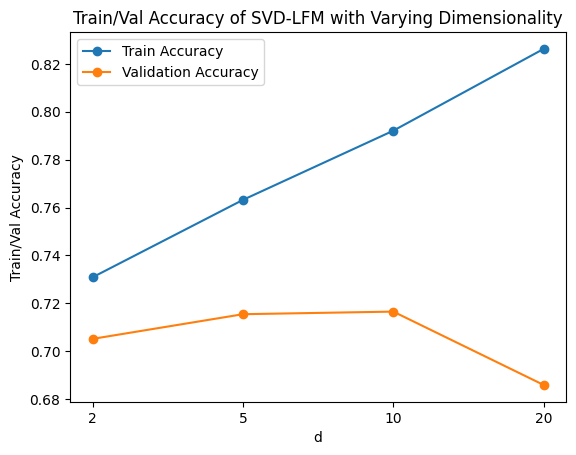

In [ ]:
# Load training data from MAT file
R = scipy.io.loadmat('hw7/movie_data/movie_train.mat')['train']

# Load validation data from CSV
val_data = np.loadtxt('hw7/movie_data/movie_validate.txt', dtype=int, delimiter=',')

# Helper method to get training accuracy
def get_train_acc(R, user_vecs, movie_vecs):
    num_correct, total = 0, 0
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if not np.isnan(R[i, j]):
                total += 1
                if np.dot(user_vecs[i], movie_vecs[j])*R[i, j] > 0:
                    num_correct += 1
    return num_correct/total

# Helper method to get validation accuracy
def get_val_acc(val_data, user_vecs, movie_vecs):
    num_correct = 0
    for val_pt in val_data:
        user_vec = user_vecs[val_pt[0]-1]
        movie_vec = movie_vecs[val_pt[1]-1]
        est_rating = np.dot(user_vec, movie_vec)
        if est_rating*val_pt[2] > 0:
            num_correct += 1
    return num_correct/val_data.shape[0]

# Helper method to get indices of all rated movies for each user,
# and indices of all users who have rated that title for each movie
def get_rated_idxs(R):
    user_rated_idxs, movie_rated_idxs = [], []
    for i in range(R.shape[0]):
        user_rated_idxs.append(np.argwhere(~np.isnan(R[i, :])).reshape(-1))
    for j in range(R.shape[1]):
        movie_rated_idxs.append(np.argwhere(~np.isnan(R[:, j])).reshape(-1))
    return np.array(user_rated_idxs, dtype=object), np.array(movie_rated_idxs, dtype=object)

# Part (c): SVD to learn low-dimensional vector representations
def svd_lfm(R):

    # Fill in the missing values in R
    ##### TODO(c): Your Code Here #####
    R = np.nan_to_num(R)

    # Compute the SVD of R
    ##### TODO(c): Your Code Here #####
    U, D, V = np.linalg.svd(R, full_matrices = False)

    # Construct user and movie representations
    ##### TODO(c): Your Code Here #####

    D_diag = np.diag(D)
    user_vecs = U.dot(D_diag)
    movie_vecs = V.T

    return user_vecs, movie_vecs

# Part (d): Compute the training MSE loss of a given vectorization
def get_train_mse(R, user_vecs, movie_vecs):

    # Compute the training MSE loss
    ##### TODO(d): Your Code Here #####

    mse_loss = 0
    rows, cols = R.shape
    for i in range(rows):
      for j in range(cols):
        if not np.isnan(R[i][j]):
          mse_loss += ((np.dot(user_vecs[i], movie_vecs[j]) - R[i][j]) ** 2)

    return mse_loss


# Part (e): Compute training MSE and val acc of SVD LFM for various d
d_values = [2, 5, 10, 20]
train_mses, train_accs, val_accs = [], [], []
user_vecs, movie_vecs = svd_lfm(np.copy(R))
for d in d_values:
    train_mses.append(get_train_mse(np.copy(R), user_vecs[:, :d], movie_vecs[:, :d]))
    train_accs.append(get_train_acc(np.copy(R), user_vecs[:, :d], movie_vecs[:, :d]))
    val_accs.append(get_val_acc(val_data, user_vecs[:, :d], movie_vecs[:, :d]))
plt.clf()
plt.plot([str(d) for d in d_values], train_mses, 'o-')
plt.title('Train MSE of SVD-LFM with Varying Dimensionality')
plt.xlabel('d')
plt.ylabel('Train MSE')
plt.savefig(fname='train_mses.png', dpi=600, bbox_inches='tight')
plt.clf()
plt.plot([str(d) for d in d_values], train_accs, 'o-')
plt.plot([str(d) for d in d_values], val_accs, 'o-')
plt.title('Train/Val Accuracy of SVD-LFM with Varying Dimensionality')
plt.xlabel('d')
plt.ylabel('Train/Val Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.savefig(fname='trval_accs.png', dpi=600, bbox_inches='tight')


# Part (f): Learn better user/movie vector representations by minimizing loss
# begin solution
best_d = 10 # TODO(f): Use best from part (e)
# end solution
np.random.seed(20)
user_vecs = np.random.random((R.shape[0], best_d))
movie_vecs = np.random.random((R.shape[1], best_d))
user_rated_idxs, movie_rated_idxs = get_rated_idxs(np.copy(R))

# Part (f): Function to update user vectors
def update_user_vecs(user_vecs, movie_vecs, R, user_rated_idxs):

    # Update user_vecs to the loss-minimizing value
    ##### TODO(f): Your Code Here #####
    d = user_vecs.shape[1]
    for i in range(R.shape[0]):
        sum_outer = np.sum([np.outer(movie_vecs[j], movie_vecs[j]) for j in user_rated_idxs[i]], axis=0)
        sum_rated = np.sum([R[i, j] * movie_vecs[j] for j in user_rated_idxs[i]], axis=0)
        user_vecs[i] = np.linalg.solve(np.eye(d) + sum_outer, sum_rated)

    return user_vecs

# Part (f): Function to update user vectors
def update_movie_vecs(user_vecs, movie_vecs, R, movie_rated_idxs):

    # Update movie_vecs to the loss-minimizing value
    ##### TODO(f): Your Code Here #####
    d = movie_vecs.shape[1]
    for j in range(R.shape[1]):
        sum_outer = np.sum([np.outer(user_vecs[i], user_vecs[i]) for i in movie_rated_idxs[j]], axis=0)
        sum_rated = np.sum([R[i, j] * user_vecs[i] for i in movie_rated_idxs[j]], axis=0)
        movie_vecs[j] = np.linalg.solve(np.eye(d) + sum_outer, sum_rated)

    return movie_vecs

# Part (f): Perform loss optimization using alternating updates
train_mse = get_train_mse(np.copy(R), user_vecs, movie_vecs)
train_acc = get_train_acc(np.copy(R), user_vecs, movie_vecs)
val_acc = get_val_acc(val_data, user_vecs, movie_vecs)
print(f'Start optim, train MSE: {train_mse:.2f}, train accuracy: {train_acc:.4f}, val accuracy: {val_acc:.4f}')
for opt_iter in range(20):
    user_vecs = update_user_vecs(user_vecs, movie_vecs, np.copy(R), user_rated_idxs)
    movie_vecs = update_movie_vecs(user_vecs, movie_vecs, np.copy(R), movie_rated_idxs)
    train_mse = get_train_mse(np.copy(R), user_vecs, movie_vecs)
    train_acc = get_train_acc(np.copy(R), user_vecs, movie_vecs)
    val_acc = get_val_acc(val_data, user_vecs, movie_vecs)
    print(f'Iteration {opt_iter+1}, train MSE: {train_mse:.2f}, train accuracy: {train_acc:.4f}, val accuracy: {val_acc:.4f}')


In [ ]:
# world value utils

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def import_world_values_data():
    """
    Reads the world values data into data frames.

    Returns:
        values_train: world_values responses on the training set
        hdi_train: HDI (human development index) on the training set
        countries: countries corresponding to indices of values_train
    """
    values_train = pd.read_csv('hw7/world-values-train2.csv')
    countries = values_train['Country']
    values_train = values_train.drop(['Country'], axis=1)
    hdi_train = pd.read_csv('hw7/world-values-hdi-train2.csv')
    hdi_train = hdi_train.drop(['Country'], axis=1)
    return values_train, hdi_train, countries


def plot_pca(training_features,
             training_labels):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        training_classes: HDI class, determined by hdi_classification(), on the training set

    Output:
        Displays plot of first two PCA dimensions vs HDI
        Displays plot of first two PCA dimensions vs HDI, colored by class
    """
    # Run PCA on training_features
    ##### TODO(a): Your Code Here #####

    pca = PCA(n_components = 2)
    transformed_features = pca.fit_transform(training_features, training_labels)

    # Plot countries by first two PCA dimensions
    plt.scatter(transformed_features[:, 0],     # Select first column
                transformed_features[:, 1],     # Select second column
                c=training_labels['2015'])
    plt.colorbar(label='Human Development Index')
    plt.title('Countries by World Values Responses after PCA')
    plt.show()


def hdi_classification(hdi):
    """
    Input:
        hdi: HDI (human development index) value

    Output:
        high HDI vs low HDI class identification
    """
    if 1.0 > hdi >= 0.7:
        return 1.0
    elif 0.7 > hdi >= 0.30:
        return 0.0
    else:
        raise ValueError('Invalid HDI')

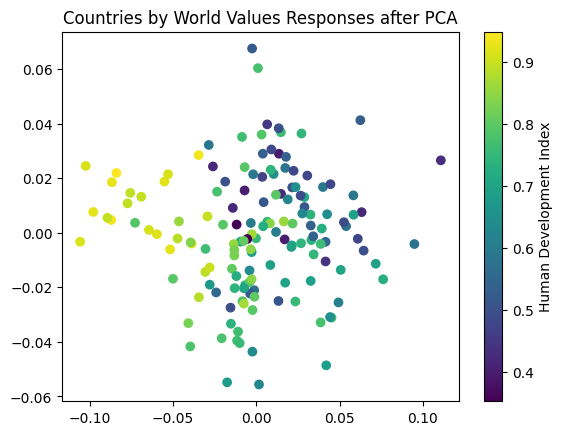

In [ ]:
values_train, hdi_train, countries = import_world_values_data()
plot_pca(values_train, hdi_train)

Predicting HDI from World Values Survey

Importing Training Data
Training Data Count: 148
Ireland
United Kingdom
Belgium
Finland
Malta
Austria
France


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


RMSE: 0.3149813290377188
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=6, weights='distance'))]) 



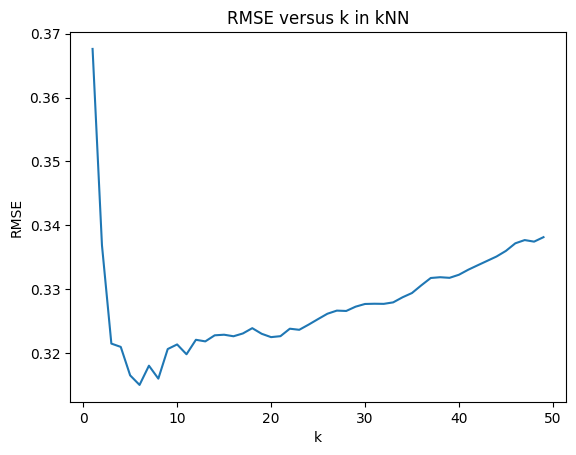

In [ ]:
# Starter

"""
The world_values data set is available online at http://54.227.246.164/dataset/. In the data,
    residents of almost all countries were asked to rank their top 6 'priorities'. Specifically,
    they were asked "Which of these are most important for you and your family?"

This code and world-values.tex guides the student through the process of training several models
    that predict the HDI (Human Development Index) rating of a country from the responses of its
    citizens to the world values data.
"""

from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors

#from world_values_utils import import_world_values_data
#from world_values_utils import plot_pca

def import_world_values_data():
    """
    Reads the world values data into data frames.

    Returns:
        values_train: world_values responses on the training set
        hdi_train: HDI (human development index) on the training set
        countries: countries corresponding to indices of values_train
    """
    values_train = pd.read_csv('hw7/world-values-train2.csv')
    countries = values_train['Country']
    values_train = values_train.drop(['Country'], axis=1)
    hdi_train = pd.read_csv('hw7/world-values-hdi-train2.csv')
    hdi_train = hdi_train.drop(['Country'], axis=1)
    return values_train, hdi_train, countries


def plot_pca(training_features,
             training_labels):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        training_classes: HDI class, determined by hdi_classification(), on the training set

    Output:
        Displays plot of first two PCA dimensions vs HDI
        Displays plot of first two PCA dimensions vs HDI, colored by class
    """
    # Run PCA on training_features
    ##### TODO(a): Your Code Here #####

    pca = PCA(n_components = 2)
    transformed_features = pca.fit_transform(training_features, training_labels)

    # Plot countries by first two PCA dimensions
    plt.scatter(transformed_features[:, 0],     # Select first column
                transformed_features[:, 1],     # Select second column
                c=training_labels['2015'])
    plt.colorbar(label='Human Development Index')
    plt.title('Countries by World Values Responses after PCA')
    plt.show()

#from world_values_pipelines import k_nearest_neighbors_regression_pipeline
#from world_values_parameters import regression_knn_parameters

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

k_nearest_neighbors_regression_pipeline = Pipeline(
        [
            # Apply scaling to k Nearest Neighbors Regression
            ##### TODO(f): Add a 'scale' parameter that applies StandardScaler() #####

              ('scaler', StandardScaler()),
            ('knn', KNeighborsRegressor())
        ]
    )

import numpy as np

regression_knn_parameters = {
    'knn__n_neighbors': np.arange(1, 50),

    # Apply uniform weighting vs k for k Nearest Neighbors Regression
    ##### TODO(d): Change the weighting #####
    'knn__weights': ['distance']
}

def main():
    print("Predicting HDI from World Values Survey\n")

    # Import Data #
    print("Importing Training Data")
    values_train, hdi_train, countries = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Data Information #
    print('Training Data Count:', values_train.shape[0])

    # Part A: PCA (modify plot_pca method in world_values_utils) #
    #plot_pca(values_train, hdi_train)

    # Part C: Find the 7 nearest neighbors of the U.S.
    nbrs = NearestNeighbors(n_neighbors=8).fit(values_train)
    us_features = values_train.iloc[45].to_numpy().reshape(1, -1)

    # Use nbrs to get the k nearest neighbors of us_features & retrieve the corresponding countries
    ##### TODO(c): Your Code Here #####

    distances, indices = nbrs.kneighbors(us_features)
    for i in indices.flatten()[1:]:
      print(countries.iloc[i])

    # Part D: complete _rmse_grid_search to find the best value of k for Regression Grid Search #
    # Parts F and H: rerun this after modifications to find the best value of k for Regression Grid Search #

    _rmse_grid_search(values_train, hdi_shifted_train,
                      k_nearest_neighbors_regression_pipeline,
                      regression_knn_parameters, 'knn')


def _rmse_grid_search(training_features, training_labels, pipeline, parameters, technique):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: regression model specific pipeline
        parameters: regression model specific parameters
        technique: regression model's name

    Output:
        Prints best RMSE and best estimator
        Prints feature weights for Ridge and Lasso Regression
        Plots RMSE vs k for k Nearest Neighbors Regression
    """
    # Use GridSearchCV to create and fit a grid of search results
    ##### TODO(d): Your Code Here #####
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=20)
    grid.fit(training_features, training_labels)


    print("RMSE:", sqrt(-grid.best_score_))
    print(grid.best_estimator_, "\n")

    # Plot RMSE vs k for k Nearest Neighbors Regression
    plt.plot(grid.cv_results_['param_knn__n_neighbors'],
             (-grid.cv_results_['mean_test_score'])**0.5)
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.title('RMSE versus k in kNN')
    plt.show()


if __name__ == '__main__':
    main()
